<a href="https://colab.research.google.com/github/OD1992/Python-programs/blob/main/pasteur_data_model_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np

%config InlineBackend.figure_format = 'retina'
# Initialize random number generator
RANDOM_SEED = 8927
np.random.seed(RANDOM_SEED)
az.style.use("arviz-darkgrid")
import warnings
import pandas as pd
import statsmodels.api as sm
from statsmodels.genmod.families import Gaussian, Gamma
from statsmodels.genmod.families.links import identity, log, sqrt
#!pip install PyMC3
import pymc3 as pm
print(f"Running on PyMC3 v{pm.__version__}")

bd_url ='/base_Fichier_3.csv'
df_3 = pd.read_csv(bd_url)
#******** Analysis of df_3 where we have the locations: Keur Aliou, Keur Alpha, Keur Diallo and Barkedji *****************************************
keur_Aliou = pd.DataFrame({'Density':df_3.Density_Keur_Aliou, 'Rainfall':df_3.Rainfall_Keur_Aliou, 'Temperature':df_3.Temperature_Keur_Aliou, 'Humidity':df_3.Humidity_Keur_Aliou})
keur_Alpha = pd.DataFrame({'Density':df_3.Density_Keur_Alpha, 'Rainfall':df_3.Rainfall_Keur_Alpha, 'Temperature':df_3.Temperature_Keur_Alpha, 'Humidity':df_3.Humidity_Keur_Alpha})
keur_Diallo = pd.DataFrame({'Density':df_3.Density_Keur_Diallo, 'Rainfall':df_3.Rainfall_Keur_Diallo, 'Temperature':df_3.Temperature_Keur_Diallo, 'Humidity':df_3.Humidity_Keur_Diallo})
Barkedji = pd.DataFrame({'Density':df_3.Density_Barkedji, 'Rainfall':df_3.Rainfall_Barkedji, 'Temperature':df_3.Temperature_Barkedji, 'Humidity':df_3.Humidity_Barkedji})
#******************** Give names of the dataframes *****************************
keur_Aliou.name='Keur Aliou'
keur_Alpha.name='Keur Alpha'
keur_Diallo.name='Keur Diallo'
Barkedji.name='Barkedji'  

Running on PyMC3 v3.11.5


[inf inf inf inf]


[inf inf inf inf]


[inf inf inf inf]


[inf inf inf inf]


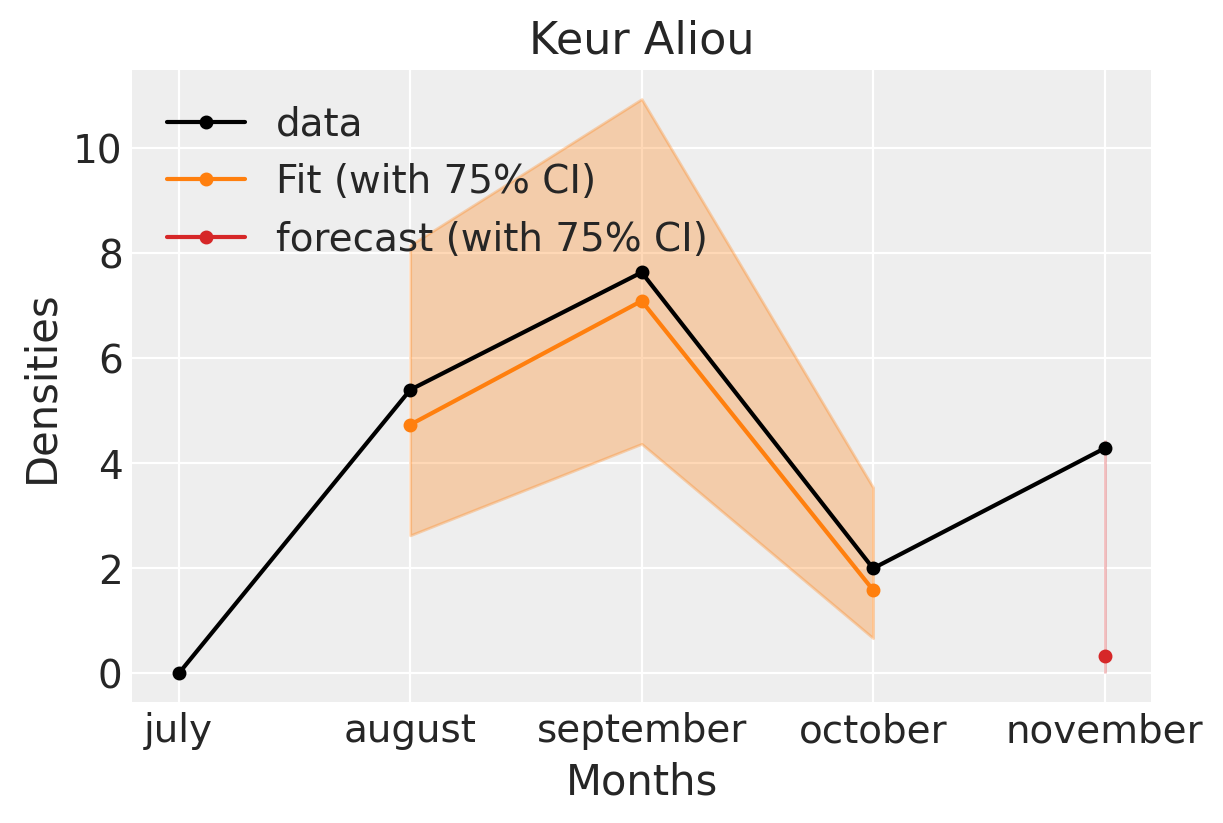

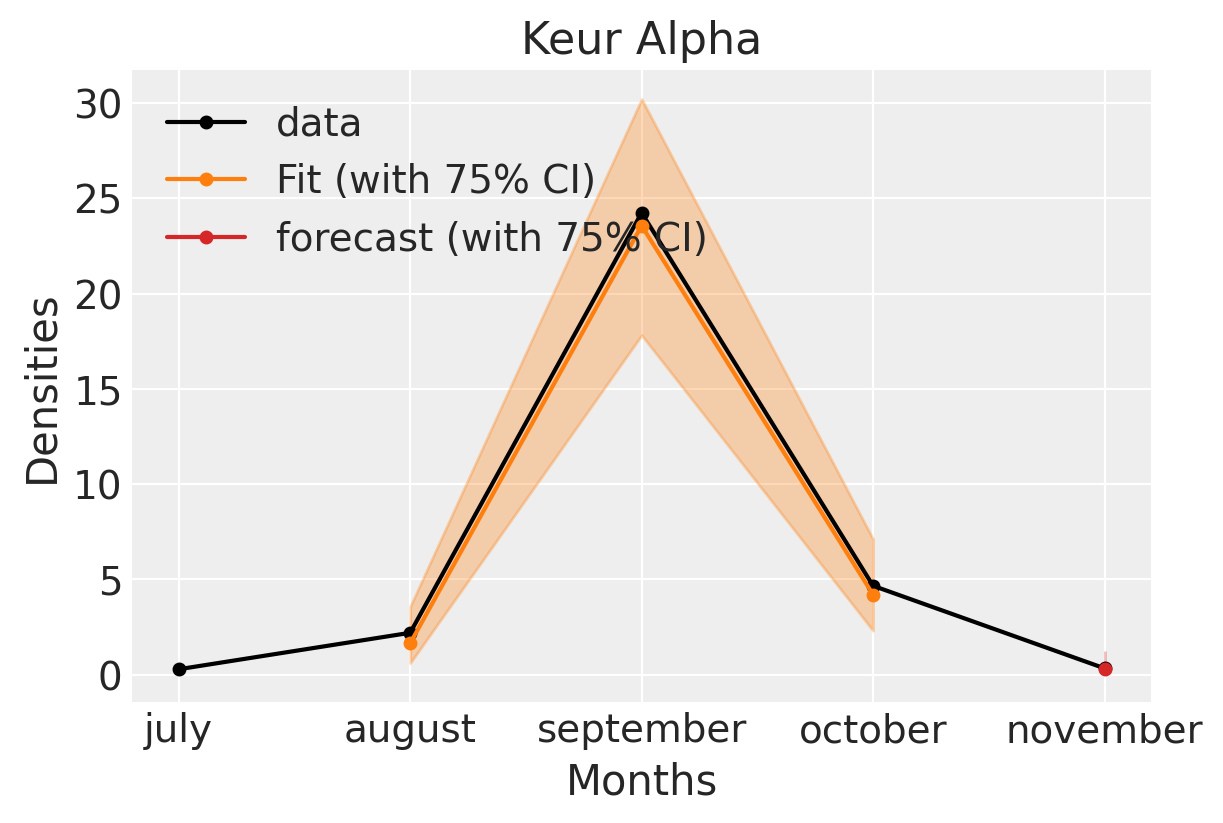

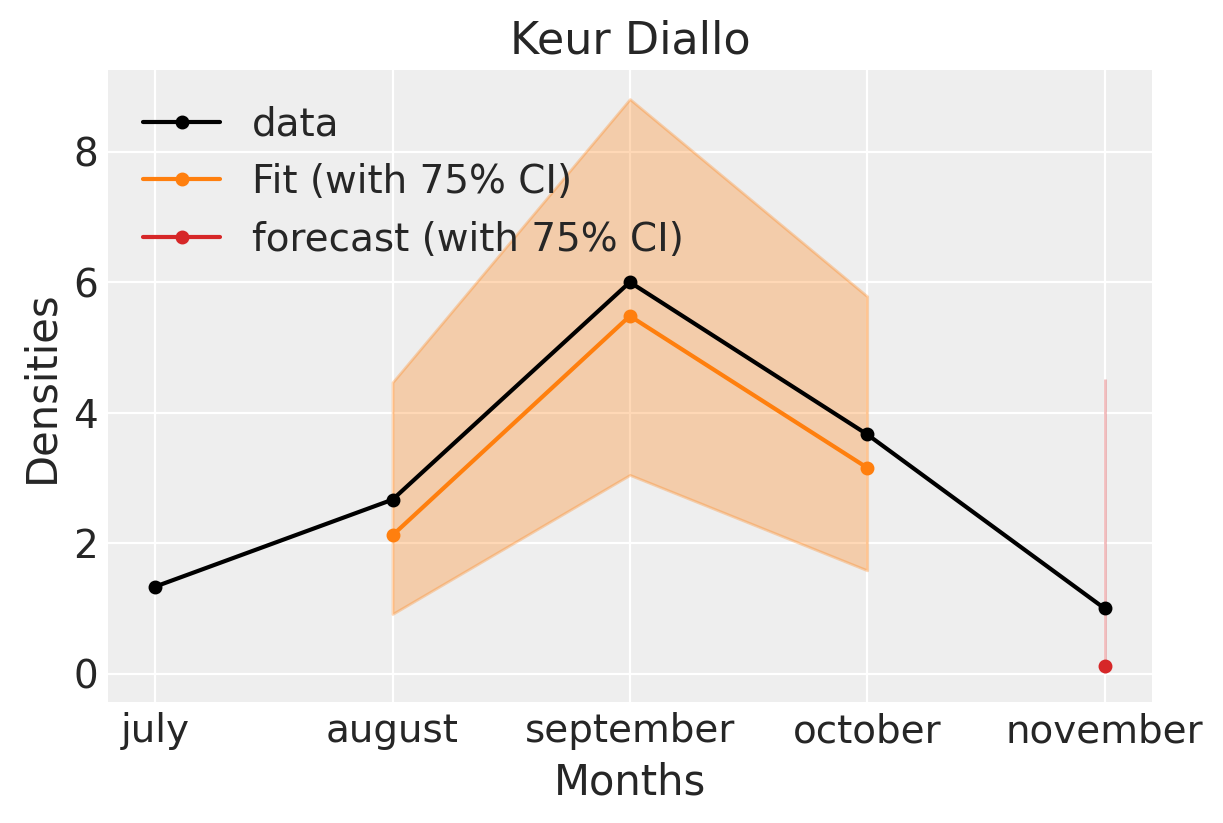

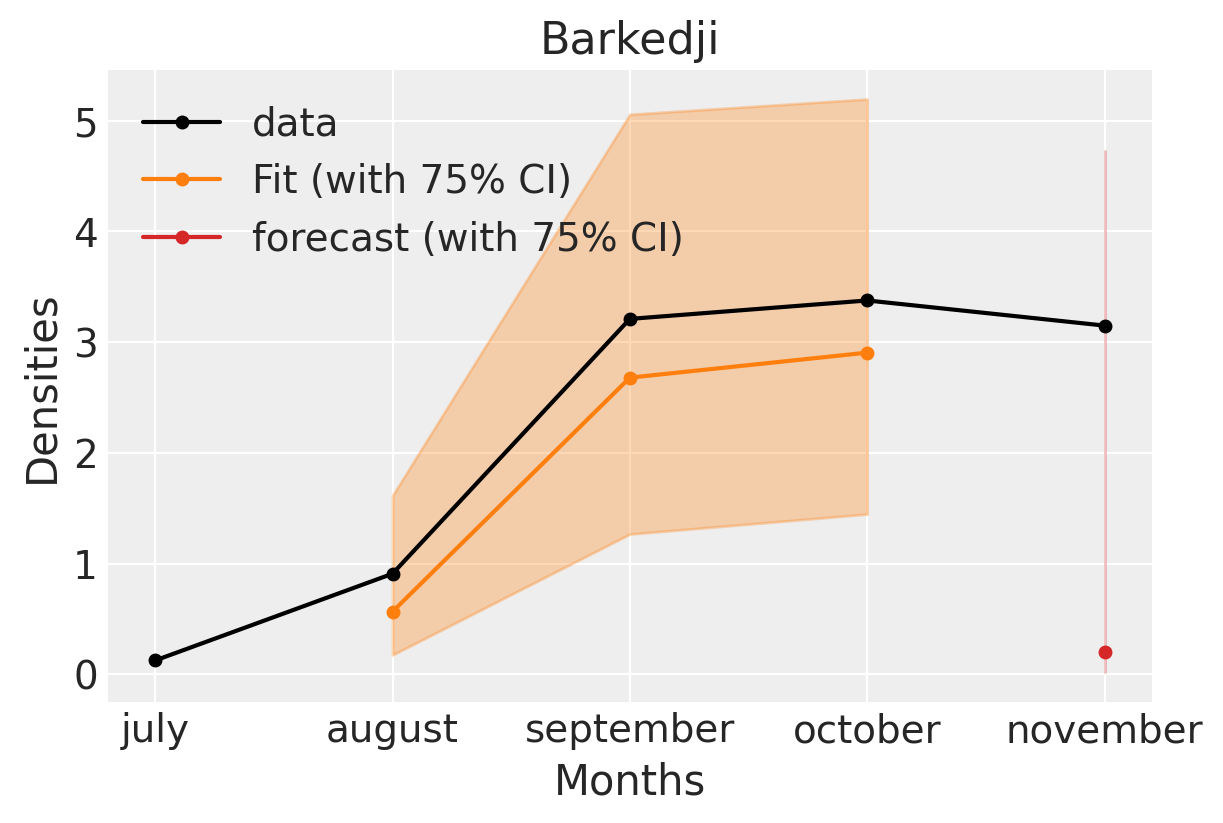

In [ ]:
#We are interested in predicting outcomes Y as normally-distributed observations with an expected value mu that is a linear function of two predictor variables X_1,X_2 and X_3
warnings.filterwarnings("ignore") 
sites = [keur_Aliou.name, keur_Alpha.name, keur_Diallo.name, Barkedji.name]
Base = [keur_Aliou, keur_Alpha, keur_Diallo, Barkedji]
h_R=1; h_T=0; h_H=0
t_i=1; t_c=4; t_e=np.shape(keur_Aliou)[0]; intercept=np.ones(t_e)

for sw_site in sites:  
    #print("**********************",sw_site)
    if sw_site==sites[0]:
        y_o = keur_Aliou.iloc[:,0].values
        y_train = y_o[t_i:t_c]
        y_test=y_o[t_c:t_e]
        X_train = np.c_[intercept[t_i:t_c],keur_Aliou.iloc[t_i-h_R:t_c-h_R,1], keur_Aliou.iloc[t_i-h_T:t_c-h_T,2], keur_Aliou.iloc[t_i-h_H:t_c-h_H,3]]
        X_test = np.c_[intercept[t_c:t_e], keur_Aliou.iloc[t_c-h_R:t_e-h_R,1], keur_Aliou.iloc[t_c-h_T:t_e-h_T,2], keur_Aliou.iloc[t_c-h_H:t_e-h_H,3]]
    if sw_site==sites[1]:
        y_o = keur_Alpha.iloc[:,0].values
        y_train = y_o[t_i:t_c]
        y_test=y_o[t_c:t_e]
        X_train = np.c_[intercept[t_i:t_c],keur_Alpha.iloc[t_i-h_R:t_c-h_R,1], keur_Alpha.iloc[t_i-h_T:t_c-h_T,2], keur_Alpha.iloc[t_i-h_H:t_c-h_H,3]]
        X_test = np.c_[intercept[t_c:t_e], keur_Alpha.iloc[t_c-h_R:t_e-h_R,1], keur_Alpha.iloc[t_c-h_T:t_e-h_T,2], keur_Alpha.iloc[t_c-h_H:t_e-h_H,3]]
    if sw_site==sites[2]:
        y_o = keur_Diallo.iloc[:,0].values
        y_train = y_o[t_i:t_c]
        y_test=y_o[t_c:t_e]
        X_train = np.c_[intercept[t_i:t_c],keur_Diallo.iloc[t_i-h_R:t_c-h_R,1], keur_Diallo.iloc[t_i-h_T:t_c-h_T,2], keur_Diallo.iloc[t_i-h_H:t_c-h_H,3]]
        X_test = np.c_[intercept[t_c:t_e],keur_Diallo.iloc[t_c-h_R:t_e-h_R,1], keur_Diallo.iloc[t_c-h_T:t_e-h_T,2], keur_Diallo.iloc[t_c-h_H:t_e-h_H,3]]
    if sw_site==sites[3]:
        y_o = Barkedji.iloc[:,0].values
        y_train = y_o[t_i:t_c]
        y_test=y_o[t_c:t_e]
        X_train = np.c_[intercept[t_i:t_c],Barkedji.iloc[t_i-h_R:t_c-h_R,1], Barkedji.iloc[t_i-h_T:t_c-h_T,2], Barkedji.iloc[t_i-h_H:t_c-h_H,3]]
        X_test = np.c_[intercept[t_c:t_e],Barkedji.iloc[t_c-h_R:t_e-h_R,1], Barkedji.iloc[t_c-h_T:t_e-h_T,2], Barkedji.iloc[t_c-h_H:t_e-h_H,3]]
   
    #N.B: for certain link this error message is displaye: Perfect separation detected, results not available
    model = sm.GLM(y_train, X_train, family=Gaussian(link = log)).fit()
    mu_predictions = np.exp(X_train@model.params)
    mu_forecasts = np.exp(X_test@model.params)
    #*********************************************************************
    ecart_type = np.sqrt(np.diag(model.cov_params()))
    print(ecart_type)
    #*************************************************************
    # True parameter values
    sigma = 1
    alpha = model.params[0]
    beta = [model.params[1], model.params[2], model.params[3]]
    # Size of dataset
    size = t_c-t_i
    # Predictor variable
    X1 = X_train[:,1]
    X2 = X_train[:,2]
    X3 = X_train[:,3]

    # Simulate outcome variable
    Y = np.exp(alpha + beta[0] * X1 + beta[1] * X2 + beta[2] * X3) #+ np.random.randn(size) * sigma

    #fig, axes = plt.subplots(1, 2,  sharex=True, figsize=(6, 2))
    #axes[0].scatter(X1, Y, alpha=0.6)
    #axes[1].scatter(X2, Y, alpha=0.6)
    #axes[1].scatter(X3, Y, alpha=0.6)
    #axes[0].set_ylabel("Density")
    #axes[0].set_xlabel("Rainfall")
    #axes[1].set_xlabel("Temperature")
    #axes[1].set_xlabel("Humidity");

    basic_model = pm.Model()
    with basic_model:
        # Priors for unknown model parameters
        alpha = pm.Normal("alpha", mu=model.params[0], sigma=0.5)
        beta[0] = pm.Normal("beta[0]", mu=model.params[1], sigma=0.5)
        beta[1] = pm.Normal("beta[1]", mu=model.params[2], sigma=0.5)
        beta[2] = pm.Normal("beta[2]", mu=model.params[3], sigma=0.5)
        # Expected value of outcome
        mu = np.exp(alpha + beta[0] * X1 + beta[1] * X2 + beta[2] * X3)
        # Likelihood (sampling distribution) of observations
        #Y_obs = pm.Normal("Y_obs", mu=mu, sigma=1, observed=y_train)
        # observed cases are distributed following studentT around the model
        pm.StudentT(
            "obs",
            nu=4,
            mu=mu,
            sigma=mu ** 0.5 ,
            observed=y_train
            )  
        
        mu = pm.Deterministic('mu', mu)
    #*****Maximum a posteriori methods: By default, find_MAP uses the Broyden–Fletcher–Goldfarb–Shanno (BFGS) optimization algorithm 
    #map_estimate = pm.find_MAP(model=basic_model)
    #print(sw_site, map_estimate)
    #****we use Powell’s method to find the MAP
    #map_estimate = pm.find_MAP(model=basic_model, method="powell")
    #print(sw_site, map_estimate)

    #Sampling methods
    with basic_model:
        # draw 500 posterior samples
        trace = pm.sample(draws=1000,tune=500)
        #trace["alpha"] #We can see the  values for the alpha variable as follows:
        Y_forecasted = np.exp(trace["alpha"] + trace["beta[0]"] * X_test[:,1] + trace["beta[1]"] * X_test[:,2] + trace["beta[2]"] * X_test[:,3])
        with basic_model:
            #display(az.summary(trace, round_to=2))
            #az.plot_trace(trace);
            plt.figure(figsize=(6,4))
            plt.plot(df_3.Date, y_o, label='data',color = "black" , marker='o', markersize=4)
            percentiles = np.percentile(trace.mu, q=12.5, axis=0), np.percentile(trace.mu, q=87.5, axis=0)
            percentiles_forcasts = np.percentile(Y_forecasted, q=12.5, axis=0), np.percentile(Y_forecasted, q=87.5, axis=0)
            plt.plot(df_3.Date[t_i:t_c], np.median(trace.mu, axis=0),color='tab:orange', label='Fit (with 75% CI)',  marker='o', markersize=4)
            plt.plot(df_3.Date[t_c:t_e], np.median(Y_forecasted, axis=0),color='tab:red', label='forecast (with 75% CI)',  marker='o', markersize=4)
            #print(percentiles)
            plt.fill_between(df_3.Date[t_i:t_c], percentiles[0], percentiles[1], alpha=0.3, color='tab:orange')
            plt.fill_between(df_3.Date[t_c:t_e], percentiles_forcasts[0], percentiles_forcasts[1], alpha=0.3, color='tab:red')
            #plt.yscale('log')
            plt.ylabel('Densities')
            plt.xlabel('Months')
            plt.title(sw_site)
            plt.legend(loc='upper left')